# Earthquake Data Visualization and Analysis
## by Junyoung Seo

Dataset from [Kaggle](https://www.kaggle.com/datasets/warcoder/earthquake-dataset)

Growing up in California, earthquakes were a significant concern for me. Experiencing numerous quakes, I became acutely aware of nature's power. My time living in Korea also exposed me to earthquakes, reinforcing my understanding that these natural phenomena are not just localized but a global issue. The unpredictability and sheer force of earthquakes underscored their impact, driving my curiosity about their frequency and patterns globally.

This project will study the relationship between earthquakes and other factors, such as location or time, utilizing a dataset comprising records of 782 earthquakes from January 1, 1995, to January 1, 2023, sourced from Kaggle.

The dataset includes
- **title:** title name given to the earthquake- **magnitude:**: The magnitude of the earthquak
- **date_time:** : date and ti
- **cdi:** i: The maximum reported intensity for the event ra
- **mmi:** mi: The maximum estimated instrumental intensity for the e
- **alert:** ert: The alert level - “green”, “yellow”, “orange”, and 
- **tsunami:** nami: "1" for events in oceanic regions and "0" oth
- **sig:** 
sig: A number describing how significant the event is. Larger numbers indicate a more significant event. This value is determined on a number of factors, including: magnitude, maximum MMI, felt reports, and estimated
- **net:** t
net: The ID of a data contributor. Identifies the network considered to be the preferred source of information for thi
- **nst:** t.
nst: The total number of seismic stations used to determine earthquake
- **dmin:** n.
dmin: Horizontal distance from the epicenter to the neare
- **gap:** tion
gap: The largest azimuthal gap between azimuthally adjacent stations (in degrees). In general, the smaller this number, the more reliable is the calculated horizontal position of the earthquake. Earthquake locations in which the azimuthal gap exceeds 180 degrees typically have large location and depth un
- **magType:** s
magType: The method or algorithm used to calculate the preferred magnitude f
- **depth:** vent
depth: The depth where the earthquake begi
- **latitude / longitude:**  / longitude: coordinate system by means of which the position or location of any place on Earth's surface can be determined
- **location:** bed
location: location wit
- **continent:** try
continent: continent of the earthq
- **country:** ountry
country: affected country

# Data Visualization

Let's see the dataset.

In [330]:
import pandas as pd

#reading data
data= pd.read_csv('earthquake_1995-2023.csv')
data.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


In this dataset, we only will need data, latitude, longtitude, location and magnitude columns to check the global frequncy of earthquake.

In [331]:
#selecting date_time, latitude, longitude, location, magnitude from data
df = data.loc[:, ("date_time", "latitude", "longitude", "location", "magnitude")]
df.head()

,date_time,latitude,longitude,location,magnitude
0,16-08-2023 12:47,-13.8814,167.1580,"Sola, Vanuatu",6.5
1,19-07-2023 00:22,12.8140,-88.1265,"Intipucá, El Salvador",6.5
2,17-07-2023 03:05,-38.1911,-70.3731,"Loncopué, Argentina",6.6
3,16-07-2023 06:48,54.3844,-160.6990,"Sand Point, Alaska",7.2
4,16-07-2023 06:48,54.4900,-160.7960,Alaska Peninsula,7.3


After importing the dataset and filtering the necessary columns for analysis (date_time, latitude, longitude, location, and magnitude), I encountered challenges with the date_time format for analysis. To resolve this, I converted the date_time column to a datetime format, enabling easier manipulation and extraction of year, month, and day for model analysis.


In [332]:
# convert 'date_time' to designed format
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')

# Creating 'date' column with'YYYY-MM-DD'
df['date'] = df['date_time'].dt.strftime('%Y-%m-%d')

# Extracting year, month, and day
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['day'] = df['date_time'].dt.day

df

,date_time,latitude,longitude,location,magnitude,date,year,month,day
0,2023-08-16 12:47:00,-13.8814,167.1580,"Sola, Vanuatu",6.5,2023-08-16,2023,8,16
1,2023-07-19 00:22:00,12.8140,-88.1265,"Intipucá, El Salvador",6.5,2023-07-19,2023,7,19
2,2023-07-17 03:05:00,-38.1911,-70.3731,"Loncopué, Argentina",6.6,2023-07-17,2023,7,17
3,2023-07-16 06:48:00,54.3844,-160.6990,"Sand Point, Alaska",7.2,2023-07-16,2023,7,16
4,2023-07-16 06:48:00,54.4900,-160.7960,Alaska Peninsula,7.3,2023-07-16,2023,7,16
...,...,...,...,...,...,...,...,...,...
995,1995-05-27 13:03:00,52.6290,142.8270,"Tungor, Russia",7.1,1995-05-27,1995,5,27
996,1995-05-16 20:12:00,-23.0080,169.9000,"Vao, New Caledonia",7.7,1995-05-16,1995,5,16
997,1995-05-14 11:33:00,-8.3780,125.1270,"Maubara, Timor Leste",6.9,1995-05-14,1995,5,14
998,1995-05-13 08:47:00,40.1490,21.6950,"Aianí, Greece",6.6,1995-05-13,1995,5,13


Cleaning the data

In [333]:
#dropping all null values
df_cleaned = df.dropna(subset=["date_time", "latitude", "longitude", "location", "magnitude"])

df_cleaned.head()

,date_time,latitude,longitude,location,magnitude,date,year,month,day
0,2023-08-16 12:47:00,-13.8814,167.1580,"Sola, Vanuatu",6.5,2023-08-16,2023,8,16
1,2023-07-19 00:22:00,12.8140,-88.1265,"Intipucá, El Salvador",6.5,2023-07-19,2023,7,19
2,2023-07-17 03:05:00,-38.1911,-70.3731,"Loncopué, Argentina",6.6,2023-07-17,2023,7,17
3,2023-07-16 06:48:00,54.3844,-160.6990,"Sand Point, Alaska",7.2,2023-07-16,2023,7,16
4,2023-07-16 06:48:00,54.4900,-160.7960,Alaska Peninsula,7.3,2023-07-16,2023,7,16


We possess an extensive dataset that offers a rich opportunity to visualize earthquake frequencies. While a straightforward classification of countries and graph-based visualization might suffice, our project aims to underscore the significant geological implications of earthquake frequencies. Our analysis not only categorizes earthquakes by continent but also seeks to enable more precise visualizations that could lead to diverse hypotheses.

For this purpose, we utilize the Folium library for map-based visualization. The map's center is strategically chosen to provide a familiar perspective. Each earthquake's location is marked with a circle on the map, determined by its latitude and longitude. To effectively represent the magnitude of each earthquake, the circle sizes are adjusted. Given that the original magnitude values result in circles that are too small for clear visualization, we introduce a scaling factor of 6.5. This adjustment ensures that the circle sizes accurately reflect the earthquake magnitudes, enhancing the map's informational value.

In [334]:
import folium
#creating a visualization model
m = folium.Map(location=[0, 0],     #center of the map
               zoom_start=2,
               tiles= "cartodb positron"
)

In [338]:
#creating circles
for i in range(df['date'].count()):      #loop for each rows
    folium.Circle([df['latitude'][i], df['longitude'][i]],
              radius = (df['magnitude'][i]**6.5),    #scaling factor of 6.5
              color = "white",
              fill_color = "Red"
             ).add_to(m)
m

The visualization shows the distribution of earthquakes occurring between 1995 and 2023. The graphical representation highlights a significant concentration of earthquake activity in areas close to oceans, particularly around the Pacific Ocean. This pattern suggests that tectonic shifts are notably active in or near the Pacific Ocean. Additionally, it's observed that certain countries, such as Japan and Malaysia, experience earthquakes more frequently compared to others. This information underlines the geographic and tectonic factors contributing to the prevalence of earthquakes in specific regions around the world.




# Earthquake Frequency by Continent

Now, let's determine the frequency of earthquakes categorized by continent.





I will work with the 'location name' column in the cleaned dataset (cleaned_df) to extract the names of countries from each earthquake entry. Due to the inconsistency in the naming conventions within the 'location name' column, which includes entries like "Sola, Vanuatu" or simply "Canada," I have developed a function named country_nameTThis function is designed to return the country name for any given input
 Additionally, it returns None when faced with missing values or outliers, ensuring data integrity and consistency in the extraction process.

In [339]:
import pandas as pd

def country_name(loc):
    if pd.isna(loc) or not isinstance(loc, str):
        return None  #if the value is not string or missing value, return None
    temp = loc.split(",")      #splitting with ,(comma) 
    name = temp[-1].strip() if len(temp) > 1 else loc.strip()       #return the name without unkwon country names
    return name


test = df_cleaned

#applying the function to the 'location' column
test["country"] = test["location"].apply(country_name)

test

C:\Users\고요\AppData\Local\Temp\ipykernel_1272184\1356237385.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["country"] = test["location"].apply(country_name)


,date_time,latitude,longitude,location,magnitude,date,year,month,day,country
0,2023-08-16 12:47:00,-13.8814,167.1580,"Sola, Vanuatu",6.5,2023-08-16,2023,8,16,Vanuatu
1,2023-07-19 00:22:00,12.8140,-88.1265,"Intipucá, El Salvador",6.5,2023-07-19,2023,7,19,El Salvador
2,2023-07-17 03:05:00,-38.1911,-70.3731,"Loncopué, Argentina",6.6,2023-07-17,2023,7,17,Argentina
3,2023-07-16 06:48:00,54.3844,-160.6990,"Sand Point, Alaska",7.2,2023-07-16,2023,7,16,Alaska
4,2023-07-16 06:48:00,54.4900,-160.7960,Alaska Peninsula,7.3,2023-07-16,2023,7,16,Alaska Peninsula
...,...,...,...,...,...,...,...,...,...,...
995,1995-05-27 13:03:00,52.6290,142.8270,"Tungor, Russia",7.1,1995-05-27,1995,5,27,Russia
996,1995-05-16 20:12:00,-23.0080,169.9000,"Vao, New Caledonia",7.7,1995-05-16,1995,5,16,New Caledonia
997,1995-05-14 11:33:00,-8.3780,125.1270,"Maubara, Timor Leste",6.9,1995-05-14,1995,5,14,Timor Leste
998,1995-05-13 08:47:00,40.1490,21.6950,"Aianí, Greece",6.6,1995-05-13,1995,5,13,Greece


Having identified the names of the countries, we can now proceed to ascertain the corresponding continents for these countries. To achieve this, I'm utilizing the pycountry_convert library to implement the continent_name function. This function will map each country to its respective continent, enhancing our dataset's geographic dimension and enabling more detailed, continent-level analysis.




In [340]:
import pycountry_convert as pc


#converting country names to continent names using pycountry_convert
def continent_name(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return "Unknown"  #return Unkwon if the value is wrong

#apply to each country name in the 'country' column
test['continent'] = test['country'].apply(lambda x: continent_name(x))

test

C:\Users\고요\AppData\Local\Temp\ipykernel_1272184\2070425688.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['continent'] = test['country'].apply(lambda x: continent_name(x))


,date_time,latitude,longitude,location,magnitude,date,year,month,day,country,continent
0,2023-08-16 12:47:00,-13.8814,167.1580,"Sola, Vanuatu",6.5,2023-08-16,2023,8,16,Vanuatu,Oceania
1,2023-07-19 00:22:00,12.8140,-88.1265,"Intipucá, El Salvador",6.5,2023-07-19,2023,7,19,El Salvador,North America
2,2023-07-17 03:05:00,-38.1911,-70.3731,"Loncopué, Argentina",6.6,2023-07-17,2023,7,17,Argentina,South America
3,2023-07-16 06:48:00,54.3844,-160.6990,"Sand Point, Alaska",7.2,2023-07-16,2023,7,16,Alaska,Unknown
4,2023-07-16 06:48:00,54.4900,-160.7960,Alaska Peninsula,7.3,2023-07-16,2023,7,16,Alaska Peninsula,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
995,1995-05-27 13:03:00,52.6290,142.8270,"Tungor, Russia",7.1,1995-05-27,1995,5,27,Russia,Europe
996,1995-05-16 20:12:00,-23.0080,169.9000,"Vao, New Caledonia",7.7,1995-05-16,1995,5,16,New Caledonia,Oceania
997,1995-05-14 11:33:00,-8.3780,125.1270,"Maubara, Timor Leste",6.9,1995-05-14,1995,5,14,Timor Leste,Unknown
998,1995-05-13 08:47:00,40.1490,21.6950,"Aianí, Greece",6.6,1995-05-13,1995,5,13,Greece,Europe


Let's create a bar graph to visualize the relationship between continent and earthquake occurrences.




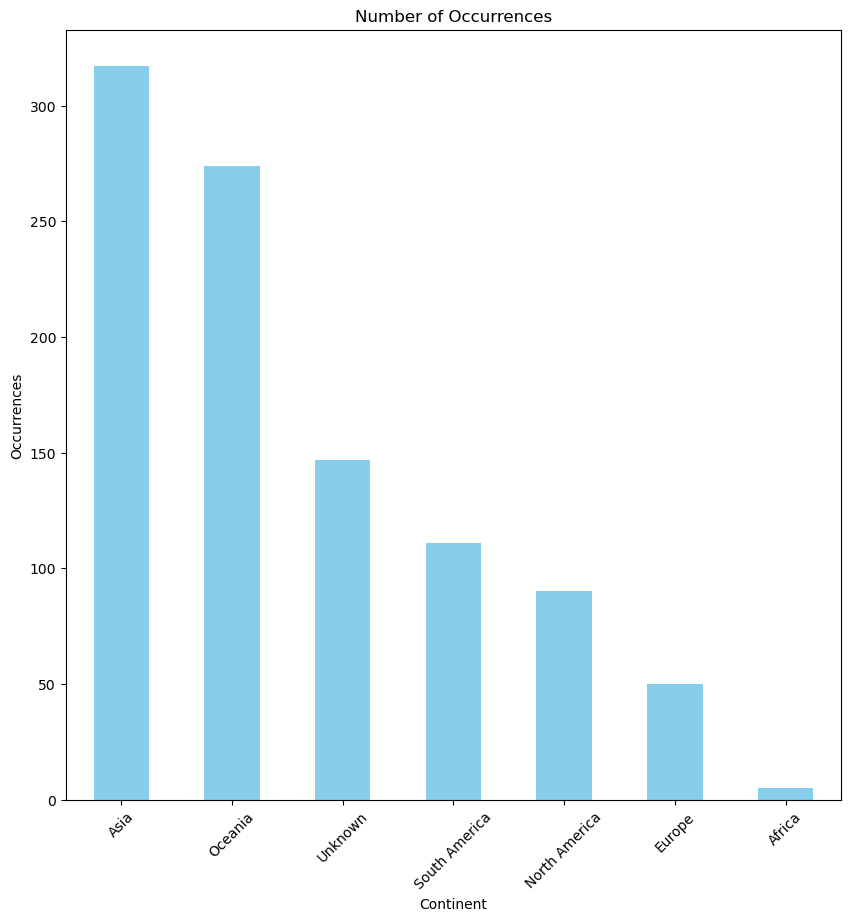

In [341]:
import matplotlib.pyplot as plt

# Count the occurrences of each continent
counts = test['continent'].value_counts()

# Generate the bar chart
plt.figure(figsize=(10, 10))
counts.plot(kind='bar', color='skyblue')
plt.title('Number of Occurrences')
plt.xlabel('Continent')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)
plt.show()

Upon examining the graph, we observe a number of entries classified under an 'Unknown' column. To enhance the visual appeal and clarity of the graph, we'll proceed to remove these outliers. This adjustment will ensure a more accurate and visually appealing representation of earthquake occurrences by continent.




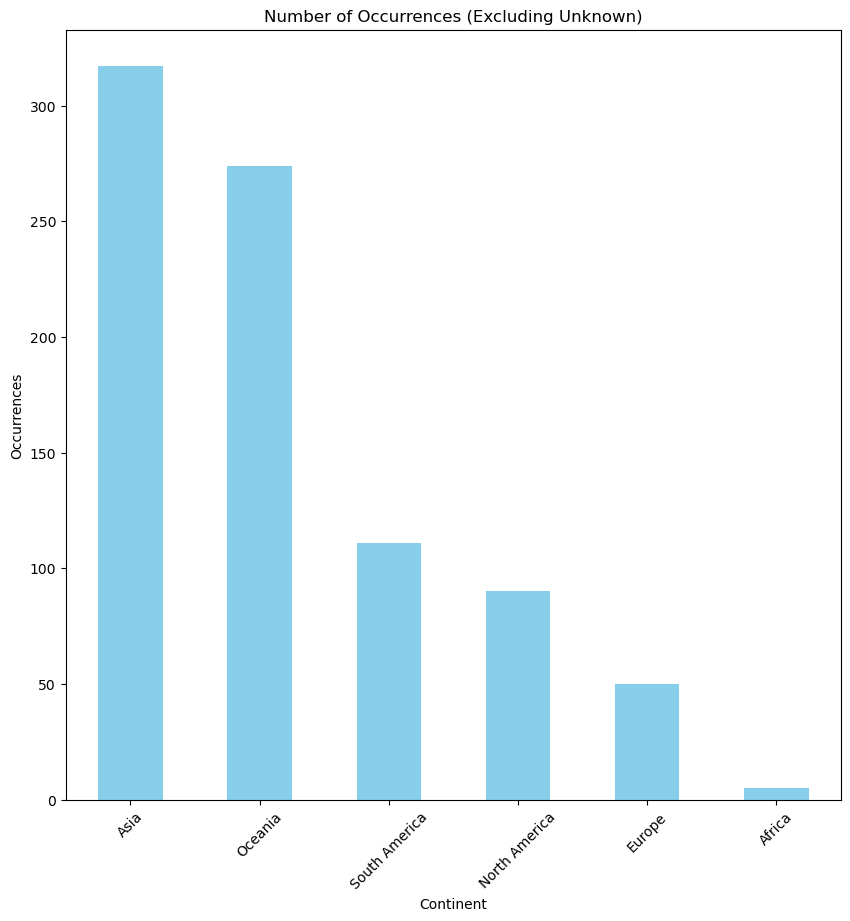

In [342]:
df_Excluding_Unknown = test[test['continent'] != 'Unknown']

# Count the occurrences of each continent in the filtered DataFrame
counts = df_Excluding_Unknown['continent'].value_counts()

# Generate the bar chart excluding 'Unknown' continent
plt.figure(figsize=(10, 10))
counts.plot(kind='bar', color='skyblue')
plt.title('Number of Occurrences (Excluding Unknown)')
plt.xlabel('Continent')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)
plt.show()

While the initial graph appears accurate, the removal of several outliers to improve its visual appeal inadvertently lowers its reliability. To address this and enhance our analysis's accuracy, we will employ the GeoPandas library for further visualization.

GeoPandas enables us to utilize the precise longitude and latitude data of earthquakes to accurately determine the continents where these events occurred. This method leverages the geographical capabilities of GeoPandas to provide a more robust and geographically precise visualization, ensuring a more reliable analysis of earthquake distribution by continen





In [343]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

#getting dataset from geopandas
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

C:\Users\고요\AppData\Local\Temp\ipykernel_1272184\2800251738.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


This analysis utilizes the 'naturalearth_lowres' dataset from GeoPandas, which includes geographical data for continents and countries worldwide. Leveraging this dataset, we will classify each recorded earthquake by the continent where it occurred. This approach will enhance our understanding of the geographical distribution of earthquakes, allowing us to identify patterns and trends across different global regions more effectively.




C:\ana3\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\고요\AppData\Local\Temp\ipykernel_1272184\1500881137.py:6: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined_gdf = gpd.sjoin(gdf, countries, how='left', op='intersects')


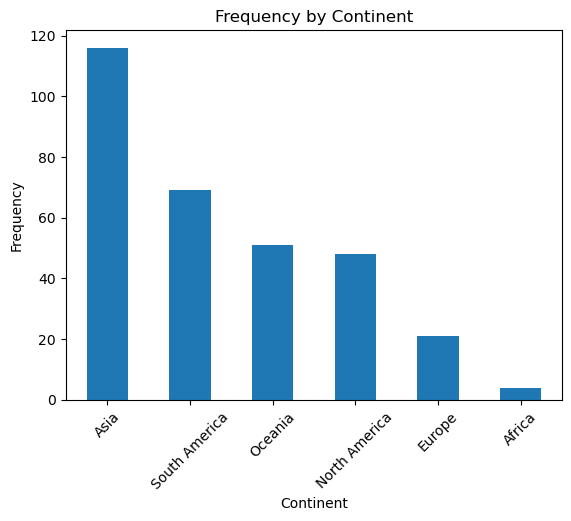

In [345]:
#converting to GeoDataFrame
cont_df = df_cleaned.loc[:, ("date_time", "latitude", "longitude", "location", "magnitude")]
gdf = gpd.GeoDataFrame(cont_df, geometry=gpd.points_from_xy(cont_df.longitude, cont_df.latitude))        #creating points using longitude and latitude

#using sjoin to combine countries and continent
joined_gdf = gpd.sjoin(gdf, countries, how='left', op='intersects')

#adding to the actual dataset
cont_df['country'] = joined_gdf['name']
cont_df['continent'] = joined_gdf['continent']

#frequency count by continent
counts = cont_df['continent'].value_counts()

#generating bar graph
counts.plot(kind='bar')

plt.title('Frequency by Continent')
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

This visualization is similar to the graph I made previously, but this graph should be more accurate.




# Decision Tree Regression on Date and Magnitude

Let's visualize the relationship between Date and Magnitude, first.

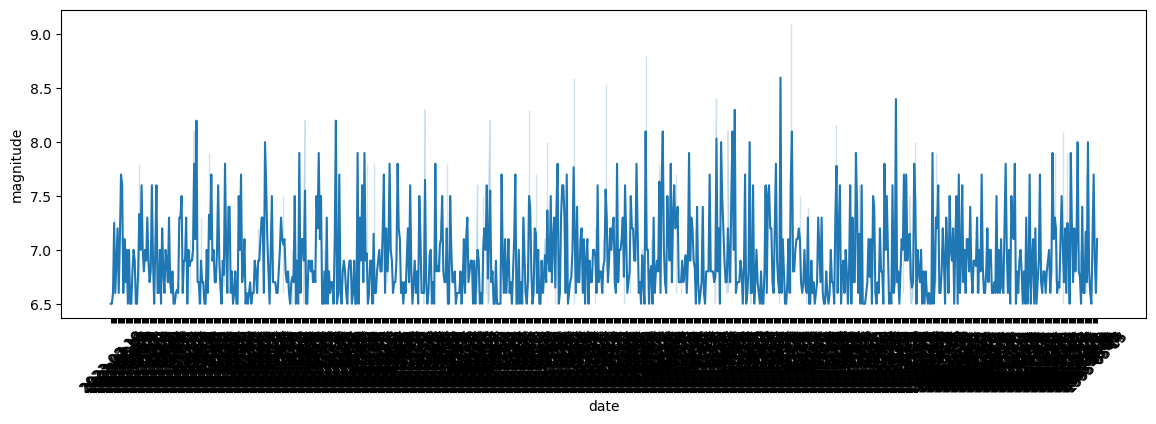

In [346]:
import matplotlib.pyplot as plt

#visualization of date and magnitude
plt.figure(figsize=(14,4))
sns.lineplot(x='date', y='magnitude', data=df_cleaned)  #x is date, y is magnitude, and using data 'df_cleaned"
plt.xticks(rotation=45)
plt.show()

The graph looks fine, but the dates are hard to read. Let's replace the date with timestamps using integer values. While we could use year, month, and day columns for simplicity, using timestamps will make the graph more accurate and easier to interpret. This approach will provide a continuous scale for the x-axis, improving readability and precision in visualizing the relationship between time and magnitude.

C:\Users\고요\AppData\Local\Temp\ipykernel_1272184\355026954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'timestamp'] = df_cleaned['date_time'].astype('int64') / 10**9


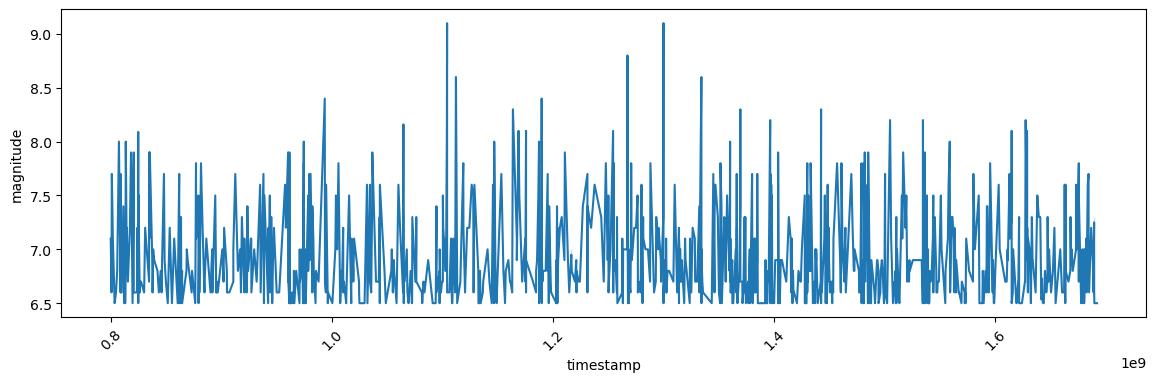

In [347]:
#calculating timestamp for each data
df_cleaned.loc[:, 'timestamp'] = df_cleaned['date_time'].astype('int64') / 10**9

#visualization with timestamp and magnitude
plt.figure(figsize=(14,4))
sns.lineplot(x='timestamp', y='magnitude', data=df_cleaned)
plt.xticks(rotation=45)
plt.show()

Much better. From this graph, I notice potential patterns between magnitude and date. I believe utilizing decision tree regression is necessary to uncover the underlying pattern in the dataset. Despite attempting linear regression, it proved ineffective due to the data's complexity and non-linearity, evidenced by a negative R^2 score. Hence, decision tree regression appears to be a more suitable approach.

Following this decision, I trained X with year, month, and day, and Y with magnitude. Subsequently, I constructed a decision tree regressor model using this trained X. Finally, I utilized the model to generate predictions on the trained data, intending to compare them with the actual data to compute the accuracy score.




In [329]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

#setting x with 'year', 'month', and 'day' / y with magnitude from 'df_cleaned'
X = df_cleaned[['year', 'month', 'day']]
y = df_cleaned['magnitude']

#Splitting test set and train set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    #20% selection for test set

#creating decision tree regressor model
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
decision_tree_regressor.fit(X_train, y_train)    #Fitting the train set in the model

#calculating the prediction
y_pred = decision_tree_regressor.predict(X_test)

#score
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5    #square root

rmse

0.5955293616163525

The R^2 value obtained is 0.5955293616163525. Although this may indicate a margin of error, I am confident that the model I've built forms a robust foundation for predicting the cyclic patterns and power of magnitude fluctuations.



